In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import seaborn as sns

#!pip install pyarrow

In [2]:
!pipreqsnb --encoding=utf8 --force

"pipreqsnb" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Подготовка исходного файла
- Загрузка и ознакомление с массивом данных.
- Изменение типов данных для дальнейшей работы с ними.
- Сохранение всех изменений в формате "parquet"



### Загрузка и ознакомление с массивом данных.

In [3]:
df_full=pd.read_csv('US_Accidents_March23.csv')

In [4]:
df_full

ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        NaN   
2        2016-02-08 07:19:27  39.063148  -84.032608       NaN        NaN   
3        2016-02-08 07:53:34  39.747753  -84.205582       NaN        NaN   
4        2016-02-08 08:09:07  39.627781  -84.188354       NaN        NaN   
...                      ...        ...         ...       ...        ...   
7728389  2019-08-23 18:32:01  34.002480 -117.379360  33.99888 -117.37094   
7728390  2019-08-23 19:38:23  32.766960 -117.148060  32.76555 -117.15363   
7728391  2019-08-23 19:28:49  33.775450 -117.847790  33.77740 -117.85727   
7728392  2019-08-23 19:29:42  33.992460 -118.403020  33.98311 -118.39565   
7728393  2019-08-23 19:21:31  34.133930 -117.230920  34.13736 -117.23934   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0               0.010  ...      False   False  False           False   
1               0.010  ...      False   False  False           False   
2               0.010  ...      False   False  False           False   
3               0.010  ...      False   False  False           False   
4               0.010  ...      False   False  False           False   
...               ...  ...        ...     ...    ...             ...   
7728389         0.543  ...      False   False  False           False   
7728390         0.338  ...      False   False  False           False   
7728391         0.561  ...      False   False  False           False   
7728392         0.772  ...      False   False  False           False   
7728393         0.537  ...      False   False  False           False   

        Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0                False        False          Night          Night   
1                False        False          Night          Night   
2                 True        False          Night          Night   
3                False        False          Night            Day   
4                 True        False            Day            Day   
...                ...          ...            ...            ...   
7728389          False        False            Day            Day   
7728390          False        False            Day            Day   
7728391          False        False            Day            Day   
7728392          False        False            Day            Day   
7728393          False        False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  
0                   Night                 Night  
1                   Night                   Day  
2                     Day                   Day  
3                     Day                   Day  
4                     Day                   Day  
...                   ...                   ...  
7728389               Day                   Day  
7728390               Day                   Day  
7728391               Day                   Day  
7728392               Day                   Day  
7728393               Day                   Day  

[7728394 rows x 46 columns]

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

###  Изменение типов данных для дальнейшей работы с ними.

In [6]:
for columns in df_full.columns:
    if df_full[columns].dtypes!='bool' and len(df_full[columns].unique())<6:
        df_full[columns]=df_full[columns].astype('category')

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Source                 category
 2   Severity               category
 3   Start_Time             object  
 4   End_Time               object  
 5   Start_Lat              float64 
 6   Start_Lng              float64 
 7   End_Lat                float64 
 8   End_Lng                float64 
 9   Distance(mi)           float64 
 10  Description            object  
 11  Street                 object  
 12  City                   object  
 13  County                 object  
 14  State                  object  
 15  Zipcode                object  
 16  Country                category
 17  Timezone               category
 18  Airport_Code           object  
 19  Weather_Timestamp      object  
 20  Temperature(F)         float64 
 21  Wind_Chill(F)          float64 

In [8]:
df_full.Wind_Direction=df_full.Wind_Direction.astype('category')
df_full.Weather_Condition=df_full.Weather_Condition.astype('category')

In [9]:
df_full.Start_Time= pd.to_datetime(df_full.Start_Time , format = 'mixed')
df_full.End_Time= pd.to_datetime(df_full.End_Time , format = 'mixed')
df_full.Weather_Timestamp=pd.to_datetime(df_full.Weather_Timestamp , format = 'mixed')

### Сохранение всех изменений в формате "parquet"

In [10]:
#!pip install pyarrow

In [11]:
df_full.to_parquet('df_full_parquet')

In [12]:

df_full_parquet=pd.read_parquet('df_full_parquet')
df_full_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 category      
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                category      
 17  Timezone               category      
 18  Airport_Code          

# Подготовка к машинному обучению
- Создание дополнительных функций.
- Находим и удаляем столбцы с большим количеством пропусков.
- Удаляем строки с пропусками.
- Выбираем важные факторы для построения модели машинного обучения.
- Оставляем данные только по штату "NY" (из за большого объема данных)

### Создание дополнительных функций.


In [13]:
def datetime_convert(df):
    df['Year']= df['Start_Time'].dt.year
    df['Month']=df['Start_Time'].dt.month
    df['Weekday']=df['Start_Time'].dt.weekday
    df['Day']=df['Start_Time'].dt.day
    df['Hour']=df['Start_Time'].dt.hour
    df['Duration(min)']=((df['End_Time']-df['Start_Time'])/
                         np.timedelta64(1, 'm')).astype(int)


In [14]:
datetime_convert(df_full_parquet)


In [15]:
df_full_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 category      
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                category      
 17  Timezone               category      
 18  Airport_Code          


### Находим и удаляем столбцы с большим количеством пропусков.

In [16]:
ltd=df_full_parquet.columns[df_full_parquet.isna().mean() > 0.03]

In [17]:
df_full_parquet.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [18]:
df_full_parquet=df_full_parquet.drop(ltd, axis=1)


### Удаляем строки с пропусками.


In [19]:
df_full_parquet=df_full_parquet.dropna(axis=0)

### Выбираем важные факторы для построения модели машинного обучения.


In [20]:
df_full_parquet.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Weekday', 'Day', 'Hour',
       'Duration(min)'],
      dtype='object')

In [21]:
Feature_list=['ID', 'Source', 'Severity', 'Start_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'County',
       'State', 'Country', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Weekday', 'Day', 'Hour',
       'Duration(min)']


In [22]:
df_full_parquet=df_full_parquet[Feature_list]

### Оставляем данные только по штату "NY" (из за большого объема данных)

In [23]:
df_NY=df_full_parquet[df_full_parquet.State=="NY"]

In [24]:
df=df_NY.copy()

# Машинное обучение
- Делим данные на 5 групп для дальнейшей перекрестной проверки.
- Делим данные на обучающие и тестовые (которые не участвовали в обучении модели)
- Выделяем важные факторы, которые могут повлиять на качество модели.
- Обучение модели и построение прогнозов.
- Выявляем 10 факторов с наибольшим влиянием на нашу цель.
- Прогноз на тествой выборке по всем группам и среднее значение. Рассчет точности.

In [25]:
config = {
    'BASE_SCORE': 0.5,
    'N_FOLDS': 5,
    'RANDOM_STATE': 123,
    'N_ESTIMATORS': 1000,
    'LEARNING_RATE': 0.3,
    'BOOSTER': 'gbtree',
    'EARLY_STOPPING_ROUNDS': 50,
    'MAX_DEPTH': 10,
    'VERBOSE': 50,
    'OBJECTIVE': "multi:softmax",
    'EVAL_METRIC': 'auc'
}

### Делим данные на 5 групп для дальнейшей перекрестной проверки.

In [26]:
train_kf = df.index

kf = KFold(n_splits=config['N_FOLDS'],
           shuffle=True,
           random_state=config['RANDOM_STATE'])

# Создаем группы и добавляем в трейн
fold = 1
for tr_idx, val_idx in kf.split(train_kf):
    fold_vids = train_kf[val_idx]
    df.loc[df.index.isin(fold_vids), 'fold'] = fold
    fold += 1
df['fold'] = df['fold'].astype('int')

In [27]:
df.Severity=df.Severity-1


### Делим данные на обучающие и тестовые (которые не участвовали в обучении модели)

In [28]:
train, test= train_test_split(df, train_size=0.8)

### Выделяем важные факторы, которые могут повлиять на качество модели.

In [29]:
FEATURES = ['Source', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Weekday', 'Day', 'Hour',
       'Duration(min)']
TARGET = 'Severity'
X_test= test[FEATURES]
fold_df = train[[TARGET, 'fold']]
submission_df = test[['ID', TARGET]].copy()

### Обучение модели и построение прогнозов.

In [30]:
models = []  # создаем список моделей
fil = []

for fold in range(1, 6):
    print(f'Fold {fold} running')
    # разбиваем трейн относительно текущей группы
    X_tr = train[train.fold!=fold][FEATURES]
    y_tr = train[train.fold!=fold][TARGET]

    X_valid = train[train.fold==fold][FEATURES]
    y_valid = train[train.fold==fold][TARGET]


    clas = xgb.XGBClassifier(base_score=config['BASE_SCORE'],
                           booster=config['BOOSTER'],
                          early_stopping_rounds=config['EARLY_STOPPING_ROUNDS'],
                          n_estimators=config['N_ESTIMATORS'],
                           max_depth=config['MAX_DEPTH'],
                           learning_rate=config['LEARNING_RATE'],
                           enable_categorical=True,
                           objective = config['OBJECTIVE'],
                           eval_metric = config['EVAL_METRIC']
                           )


    clas.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_valid, y_valid)],
            verbose=config['VERBOSE'])


    fold_preds = clas.predict(X_valid)
    fold_df.loc[fold_df['fold'] == fold, 'preds'] = fold_preds
    fold_score = accuracy_score(
        fold_df.query('fold == @fold')['Severity'],
        fold_df.query('fold == @fold')['preds'])
    balanced_fold_score = balanced_accuracy_score(
        fold_df.query('fold == @fold')['Severity'],
        fold_df.query('fold == @fold')['preds'])
    fi = pd.DataFrame(columns=[f'{fold}_importance'],
                      data=clas.feature_importances_,
                      index=clas.feature_names_in_,
                      )

    fold_test_pred=clas.predict(X_test)
    submission_df[f'pred_{fold}'] = fold_test_pred

    print(f'Score of this fold is {fold_score:0.9f}')
    print(f'Balanced Score of this fold is {balanced_fold_score :0.9f}')
    models.append(clas)
    fil.append(fi)

Fold 1 running
[0]	validation_0-auc:0.92010	validation_1-auc:0.91025
[50]	validation_0-auc:0.99232	validation_1-auc:0.96182
[100]	validation_0-auc:0.99888	validation_1-auc:0.96330
[150]	validation_0-auc:0.99982	validation_1-auc:0.96366
[200]	validation_0-auc:0.99994	validation_1-auc:0.96385
[250]	validation_0-auc:0.99996	validation_1-auc:0.96399
[300]	validation_0-auc:0.99997	validation_1-auc:0.96415
[350]	validation_0-auc:0.99997	validation_1-auc:0.96429
[400]	validation_0-auc:0.99997	validation_1-auc:0.96442
[450]	validation_0-auc:0.99997	validation_1-auc:0.96450
[494]	validation_0-auc:0.99997	validation_1-auc:0.96442


C:\Users\User-pc\AppData\Local\Temp\ipykernel_14920\1740961981.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_df.loc[fold_df['fold'] == fold, 'preds'] = fold_preds


Score of this fold is 0.918292952
Balanced Score of this fold is 0.715698383
Fold 2 running
[0]	validation_0-auc:0.91940	validation_1-auc:0.91087
[50]	validation_0-auc:0.99344	validation_1-auc:0.96221
[100]	validation_0-auc:0.99893	validation_1-auc:0.96362
[150]	validation_0-auc:0.99980	validation_1-auc:0.96422
[200]	validation_0-auc:0.99995	validation_1-auc:0.96446
[250]	validation_0-auc:0.99997	validation_1-auc:0.96469
[300]	validation_0-auc:0.99997	validation_1-auc:0.96495
[350]	validation_0-auc:0.99997	validation_1-auc:0.96506
[400]	validation_0-auc:0.99997	validation_1-auc:0.96513
[450]	validation_0-auc:0.99997	validation_1-auc:0.96515
[500]	validation_0-auc:0.99997	validation_1-auc:0.96520
[536]	validation_0-auc:0.99997	validation_1-auc:0.96514
Score of this fold is 0.915367566
Balanced Score of this fold is 0.714280697
Fold 3 running
[0]	validation_0-auc:0.91965	validation_1-auc:0.91215
[50]	validation_0-auc:0.99240	validation_1-auc:0.96271
[100]	validation_0-auc:0.99887	validat

### Выявляем 10 факторов с наибольшим влиянием на нашу цель.

<Axes: title={'center': 'Feature Importance Across Folds'}>

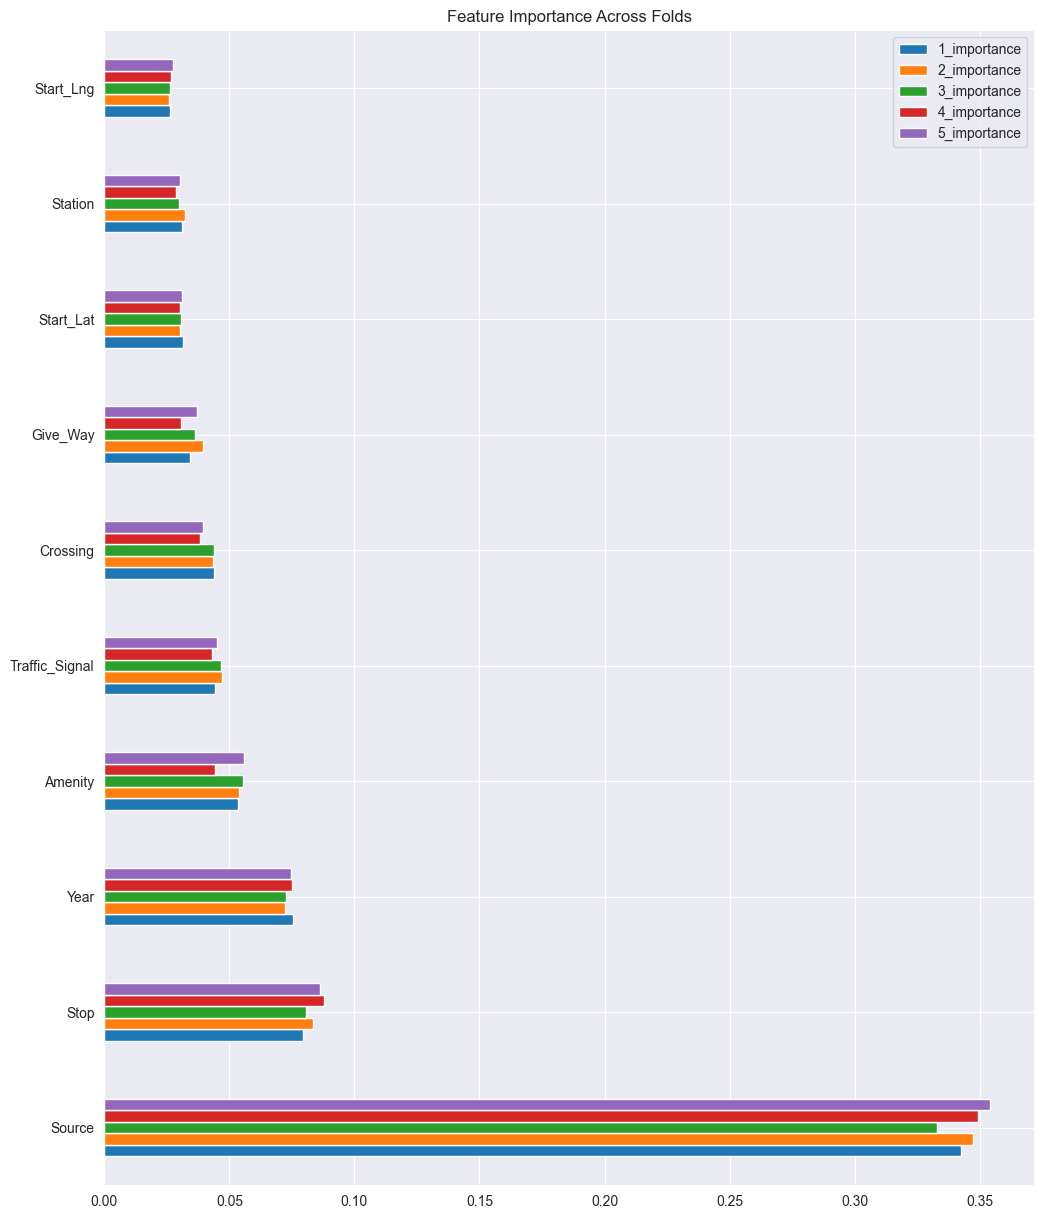

In [31]:
fil_df = pd.concat(fil, axis=1)
fil_df.sort_values("5_importance", ascending=False)[:10].plot(kind='barh', figsize=(12, 15),title='Feature Importance Across Folds')

In [32]:
top10_feature_imp=fil_df.sort_values('1_importance', ascending=False)[:10].index

<Axes: >

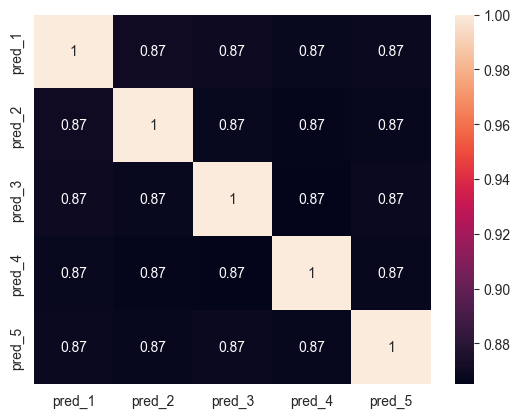

In [33]:
pred_cols = [c for c in submission_df.columns if c.startswith('pred_')]

submission_df['target'] = round(submission_df[pred_cols].mean(axis=1))
# Visually check correlation between fold predictions
sns.heatmap(submission_df[pred_cols].corr(), annot=True)

### Прогноз на тествой выборке по всем группам и среднее значение. Рассчет точности.

In [34]:
submission_df

ID  Severity  pred_1  pred_2  pred_3  pred_4  pred_5  target
4128542  A-4159619         1       1       1       1       1       1     1.0
7217915  A-7267276         1       1       1       1       1       1     1.0
3812355  A-3840924         1       1       1       1       1       1     1.0
2728151  A-2738025         2       2       2       2       2       2     2.0
1994584  A-2004447         1       1       1       1       1       1     1.0
...            ...       ...     ...     ...     ...     ...     ...     ...
194730    A-194737         1       1       1       1       1       1     1.0
7279637  A-7329000         1       2       2       2       2       1     2.0
2062676  A-2072539         1       2       2       2       2       2     2.0
803127    A-812835         1       1       1       1       1       1     1.0
5961361  A-6005799         1       1       1       1       1       1     1.0

[67773 rows x 8 columns]

In [35]:
accuracy_score(
        submission_df['Severity'],
        submission_df['target'])

0.9193336579463798